# Algoritmo K-means (Core) / Elida Peña

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



**Objetivo de la Actividad**

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.



**Descripción del Algoritmo K-means**

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.



**Instrucciones**

Carga del Dataset:
  – El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
  – Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

2. Selección de Variables:
  – Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

3. Implementación de K-means:
  – Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
  – Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

4. Elbow Method:
  – Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

5. Interpretación de Clusters:
  – Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

6. Análisis de Resultados:
  – Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?


**Expansión del Algoritmo y Aplicaciones**

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

– Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
– Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.
– Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.

In [1]:
# Paso 1: Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
ruta_dataset = "../data/Mall_Customers.csv"  # Cambia esta ruta según corresponda
df = pd.read_csv(ruta_dataset)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())

# Revisar valores nulos
print("\n¿Existen valores nulos?")
print(df.isnull().sum())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No


Datos seleccionados para el análisis de clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


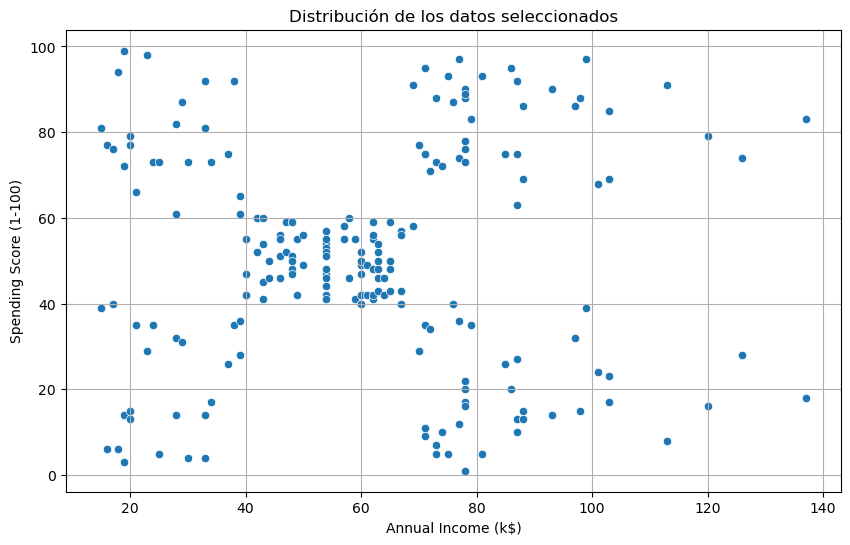

In [3]:
# Paso 2: Selección de Variables
# Seleccionar las columnas 'Annual Income (k$)' y 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualizar los datos seleccionados
print("\nDatos seleccionados para el análisis de clustering:")
print(X.head())

# Visualizar la distribución de los datos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.title('Distribución de los datos seleccionados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\59598\AppData\Local\Temp\ipykernel_19204\3625735898.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_
c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:

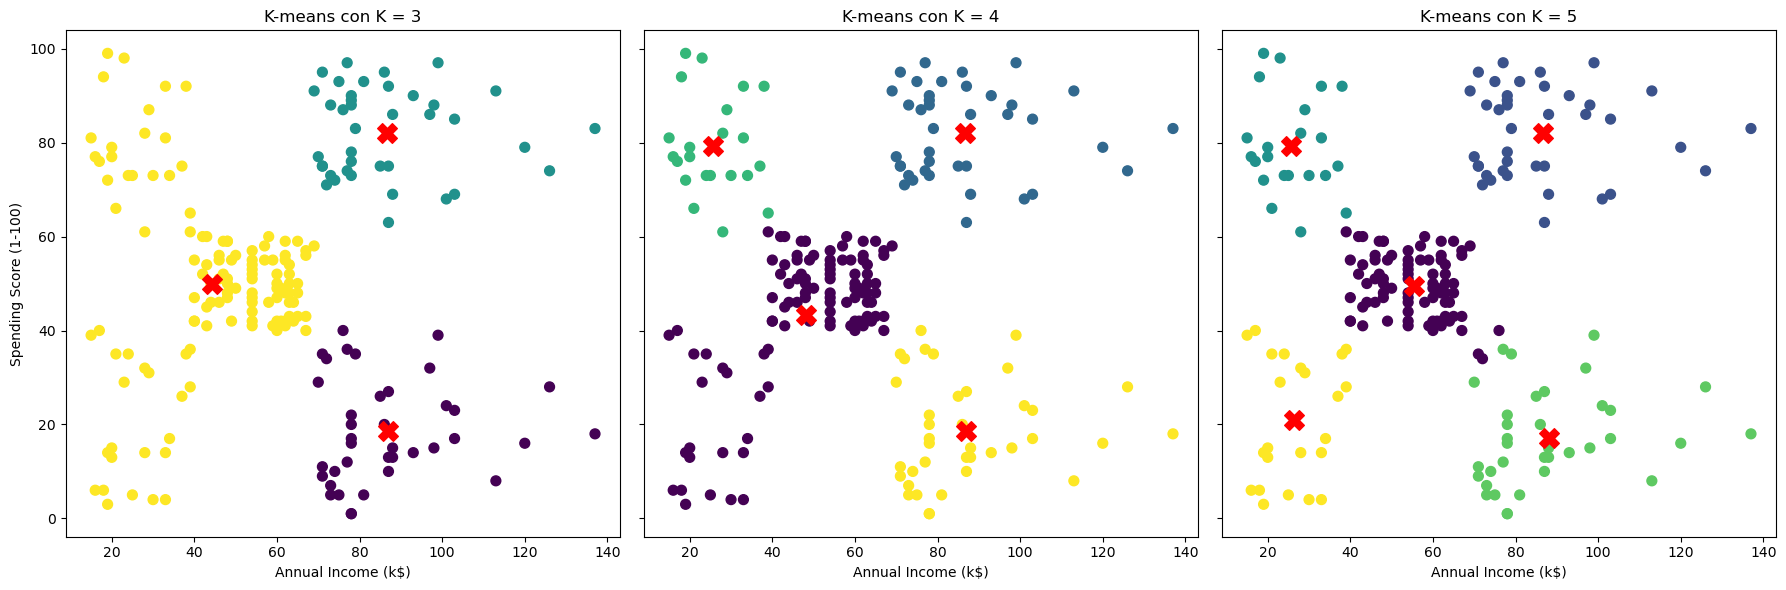

In [4]:
from sklearn.cluster import KMeans

# Paso 3: Aplicar K-means con K = 3, 4, 5
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
k_values = [3, 4, 5]

for i, k in enumerate(k_values):
    # Crear el modelo K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Predicción de clusters
    X['Cluster'] = kmeans.labels_
    
    # Visualizar los clusters
    axes[i].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['Cluster'], cmap='viridis', s=50)
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroides
    axes[i].set_title(f"K-means con K = {k}")
    axes[i].set_xlabel('Annual Income (k$)')
    if i == 0:
        axes[i].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.p

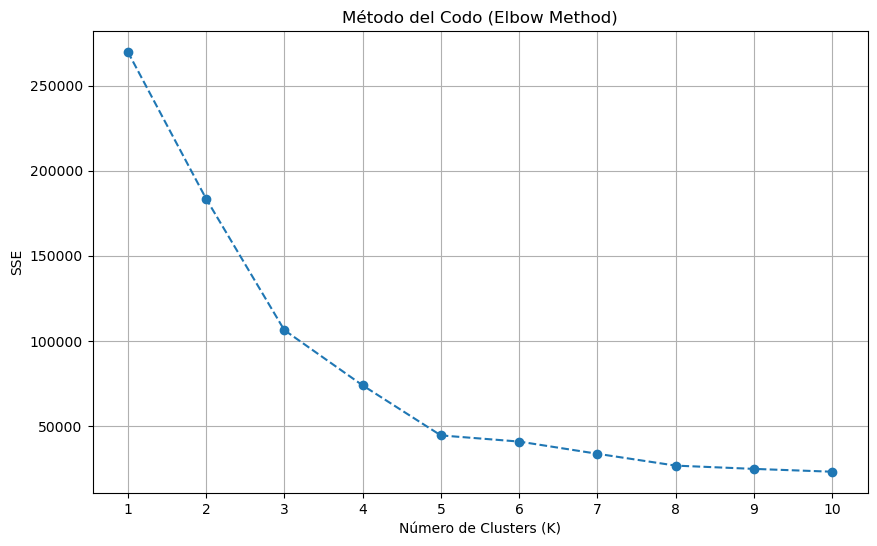

In [5]:
# Paso 4: Método del Codo
sse = []  # Suma de errores cuadráticos
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X.drop(columns=['Cluster'], errors='ignore'))
    sse.append(kmeans.inertia_)

# Visualizar el SSE para cada valor de K
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.grid()
plt.show()


c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


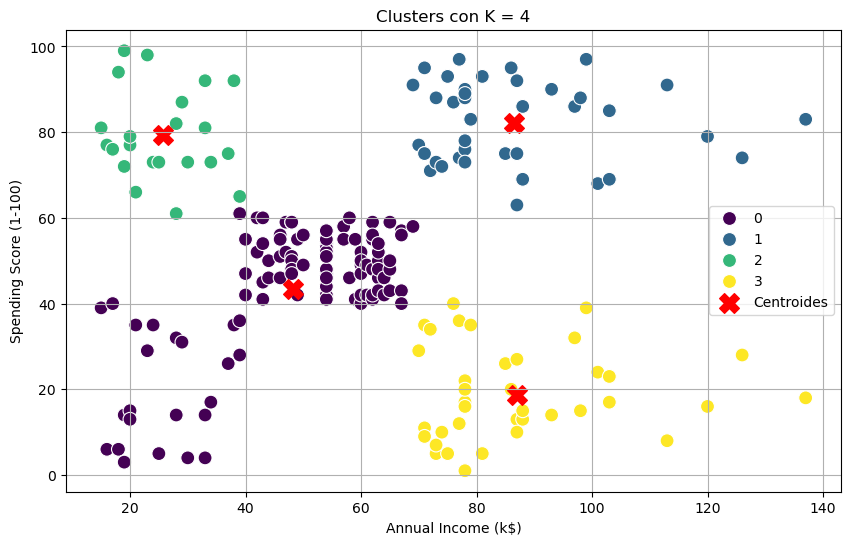

In [6]:
# Aplicar K-means con el número óptimo de clusters (ajusta según el método del codo)
k_optimo = 4  # Cambia este valor según el resultado del método del codo
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualizar los clusters generados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title(f'Clusters con K = {k_optimo}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
